In [1]:
# import the necessary packages
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [4]:
# network - Conv -> RELU -> Conv -> RELU -> POOL -> Dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [5]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

/Users/ling/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])

In [9]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [10]:
# train
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 251s - loss: 1.8168 - acc: 0.3454 - val_loss: 1.4814 - val_acc: 0.4539
Epoch 2/40
40000/40000 [==============================] - 305s - loss: 1.3735 - acc: 0.5091 - val_loss: 1.2418 - val_acc: 0.5696
Epoch 3/40
40000/40000 [==============================] - 265s - loss: 1.1718 - acc: 0.5858 - val_loss: 1.0275 - val_acc: 0.6435
Epoch 4/40
40000/40000 [==============================] - 255s - loss: 1.0323 - acc: 0.6393 - val_loss: 0.9913 - val_acc: 0.6525
Epoch 5/40
40000/40000 [==============================] - 256s - loss: 0.9266 - acc: 0.6776 - val_loss: 0.8757 - val_acc: 0.6979
Epoch 6/40
40000/40000 [==============================] - 275s - loss: 0.8484 - acc: 0.7029 - val_loss: 0.8944 - val_acc: 0.6956
Epoch 7/40
40000/40000 [==============================] - 243s - loss: 0.7910 - acc: 0.7257 - val_loss: 0.8134 - val_acc: 0.7230
Epoch 8/40
40000/40000 [=======================

In [11]:
print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Testing...
 9984/10000 [============================>.] - ETA: 0s
Test score: 0.813492297935
Test accuracy: 0.7645


In [12]:
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save('cifar10_weights.h5', overwrite=True)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


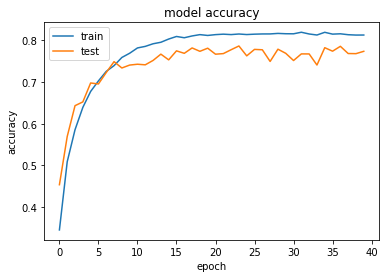

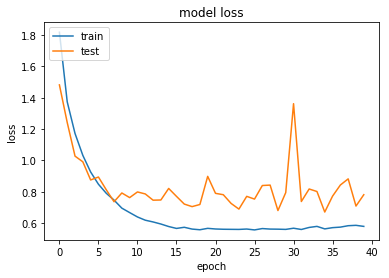

In [13]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Scoring

In [1]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
import glob
import sys

from keras.models import model_from_json
from keras.optimizers import SGD

Using TensorFlow backend.


https://www.cs.toronto.edu/~kriz/cifar.html

The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. 

In [2]:
#load model
model_architecture = 'cifar10_architecture.json'
model_weights = 'cifar10_weights.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

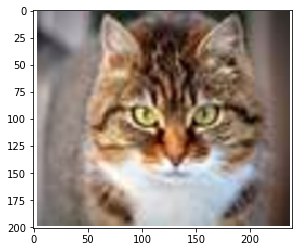

In [3]:
image = scipy.misc.imread("cats.jpg")
plt.imshow(image)
plt.show()

In [4]:
x=np.transpose(scipy.misc.imresize(scipy.misc.imread("cats.jpg", mode='RGB'), (32, 32)), (1, 0, 2)).astype('float32')
x = x.reshape((1,) + x.shape)
imgs = np.array(x) / 255
imgs.shape

(1, 32, 32, 3)

In [5]:
# train
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

In [6]:
predictions = model.predict_classes(imgs)
print(predictions)

1/1 [==============================] - 0s
[3]


Category 3 indicates 'cat' category.

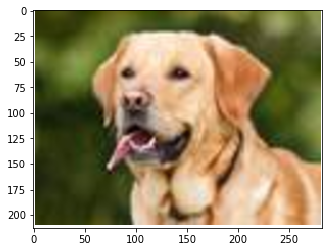

In [7]:
image = scipy.misc.imread("dog.jpg")
plt.imshow(image)
plt.show()

In [8]:
x=np.transpose(scipy.misc.imresize(scipy.misc.imread("dog.jpg", mode='RGB'), (32, 32)), (1, 0, 2)).astype('float32')
x = x.reshape((1,) + x.shape)
imgs = np.array(x) / 255
imgs.shape

(1, 32, 32, 3)

In [9]:
# train
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

In [10]:
predictions = model.predict_classes(imgs)
print(predictions)

1/1 [==============================] - 0s
[5]


Category 5 indicates 'dog' category.

### Score Tumblr pets

In [11]:
lookup = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [12]:
# path = sys.argv[1]
path = '/Users/ling/Desktop/Git/Keras/Tumblrpets'

In [13]:
print("Specified path:")
print(path)
files = glob.glob(path+"/*.png")

Specified path:
/Users/ling/Desktop/Git/Keras/Tumblrpets


In [14]:
def scoring(inputname):
    # scale 
    x=np.transpose(scipy.misc.imresize(scipy.misc.imread(inputname, mode='RGB'), (32, 32)), (1, 0, 2)).astype('float32')
    x = x.reshape((1,) + x.shape)
    imgs = np.array(x) / 255
    imgs.shape
    
    # train
    optim = SGD()
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    outputcat = model.predict_classes(imgs)
    return(outputcat[0])

files:
/Users/ling/Desktop/Git/Keras/Tumblrpets/1.png


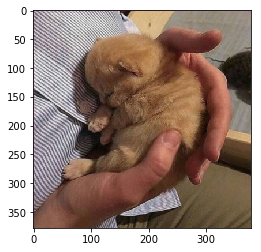

1/1 [==============================] - 0s
frog



/Users/ling/Desktop/Git/Keras/Tumblrpets/10.png


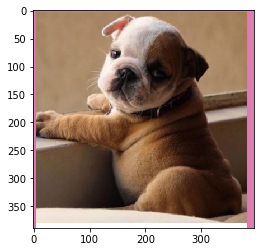

1/1 [==============================] - 0s
horse



/Users/ling/Desktop/Git/Keras/Tumblrpets/11.png


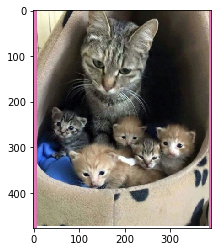

1/1 [==============================] - 0s
truck



/Users/ling/Desktop/Git/Keras/Tumblrpets/12.png


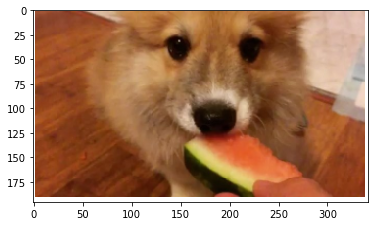

1/1 [==============================] - 0s
cat



/Users/ling/Desktop/Git/Keras/Tumblrpets/2.png


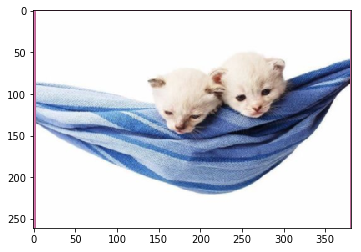

1/1 [==============================] - 0s
frog



/Users/ling/Desktop/Git/Keras/Tumblrpets/3.png


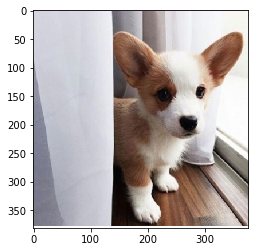

1/1 [==============================] - 0s
dog



/Users/ling/Desktop/Git/Keras/Tumblrpets/4.png


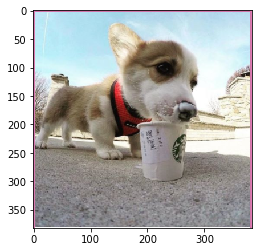

1/1 [==============================] - 0s
dog



/Users/ling/Desktop/Git/Keras/Tumblrpets/5.png


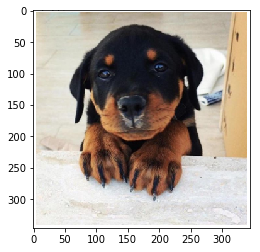

1/1 [==============================] - 0s
dog



/Users/ling/Desktop/Git/Keras/Tumblrpets/6.png


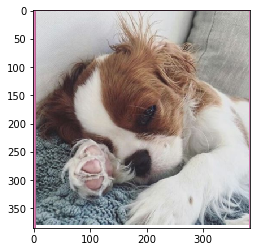

1/1 [==============================] - 0s
dog



/Users/ling/Desktop/Git/Keras/Tumblrpets/7.png


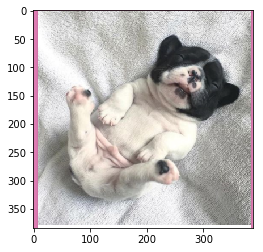

1/1 [==============================] - 0s
dog



/Users/ling/Desktop/Git/Keras/Tumblrpets/8.png


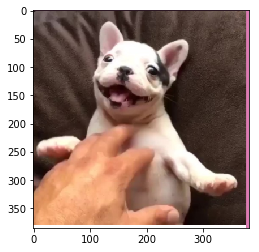

1/1 [==============================] - 0s
cat



/Users/ling/Desktop/Git/Keras/Tumblrpets/9.png


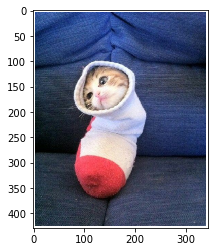

1/1 [==============================] - 0s
dog





In [15]:
print("files:")
for file_name in files:
    print(file_name)
    image = scipy.misc.imread(file_name)
    plt.imshow(image)
    plt.show()
    
    predictions = scoring(file_name)
    print(lookup[predictions])
    print("\n\n")